In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('input_data.csv', delimiter=';', parse_dates=['date'])

In [6]:
data.head()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15.0,31.0,1.0,30.3,0.0,56.780112,60.699355,0.0,2.0,620000.0,NaN,66.0,1632918.0
1,2021-01-01,1450000,5.0,5.0,1.0,33.0,6.0,44.608154,40.138381,0.0,0.0,385000.0,NaN,1.0,NaN
2,2021-01-01,10700000,4.0,13.0,3.0,85.0,12.0,55.540060,37.725112,3.0,0.0,142701.0,242543.0,50.0,681306.0
3,2021-01-01,3100000,3.0,5.0,3.0,82.0,9.0,44.608154,40.138381,0.0,0.0,385000.0,NaN,1.0,NaN
4,2021-01-01,2500000,2.0,3.0,1.0,30.0,9.0,44.738685,37.713668,3.0,2.0,353960.0,439378.0,23.0,1730985.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26342 entries, 0 to 26341
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           26342 non-null  datetime64[ns]
 1   price          26342 non-null  int64         
 2   level          26341 non-null  float64       
 3   levels         26341 non-null  float64       
 4   rooms          26341 non-null  float64       
 5   area           26341 non-null  float64       
 6   kitchen_area   26341 non-null  float64       
 7   geo_lat        26341 non-null  float64       
 8   geo_lon        26341 non-null  float64       
 9   building_type  26341 non-null  float64       
 10  object_type    26341 non-null  float64       
 11  postal_code    24687 non-null  float64       
 12  street_id      17705 non-null  float64       
 13  id_region      26341 non-null  float64       
 14  house_id       20705 non-null  float64       
dtypes: datetime64[ns](1

In [8]:
data.describe()

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
count,26342,2.634200e+04,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,26341.000000,24687.000000,17705.000000,26341.000000,2.070500e+04
mean,2021-01-02 01:39:09.798800640,3.064406e+07,6.580654,11.806006,1.796743,55.175418,-9.472914,54.238894,49.484907,2.073991,0.625717,369382.580994,354070.330472,51.808891,1.710335e+06
min,2021-01-01 00:00:00,1.800000e+01,0.000000,1.000000,-1.000000,10.000000,-100.000000,42.024140,19.912615,0.000000,0.000000,101000.000000,116257.000000,1.000000,5.886640e+05
25%,2021-01-01 00:00:00,2.250000e+06,2.000000,5.000000,1.000000,37.400000,0.000000,52.703217,37.501483,0.000000,0.000000,184091.500000,233163.000000,30.000000,1.172196e+06
50%,2021-01-02 00:00:00,3.580000e+06,5.000000,9.000000,2.000000,49.000000,7.100000,55.580845,39.749390,2.000000,0.000000,354053.000000,350309.000000,54.000000,1.703143e+06
75%,2021-01-03 00:00:00,6.500000e+06,9.000000,17.000000,3.000000,65.000000,11.600000,56.781042,56.245180,4.000000,2.000000,607081.000000,473484.000000,74.000000,2.269067e+06
max,2021-01-03 00:00:00,6.355524e+11,50.000000,50.000000,8.000000,497.000000,160.000000,71.634827,177.502180,6.000000,2.000000,693023.000000,588560.000000,200.000000,2.839024e+06
std,NaN,3.915929e+09,5.665264,7.653543,1.186832,28.854879,41.805972,4.884320,20.779025,1.690956,0.927332,193642.439829,137715.776123,23.309715,6.433641e+05


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

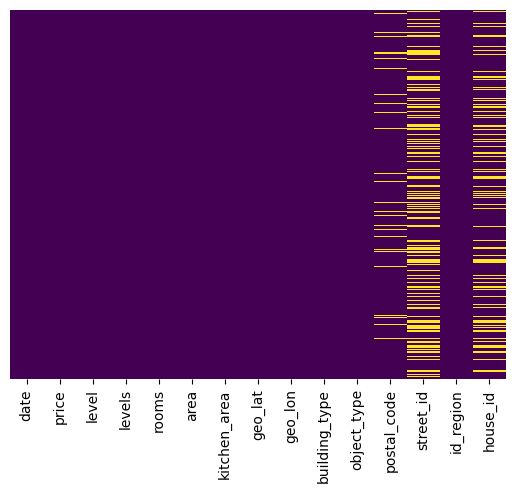

In [10]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

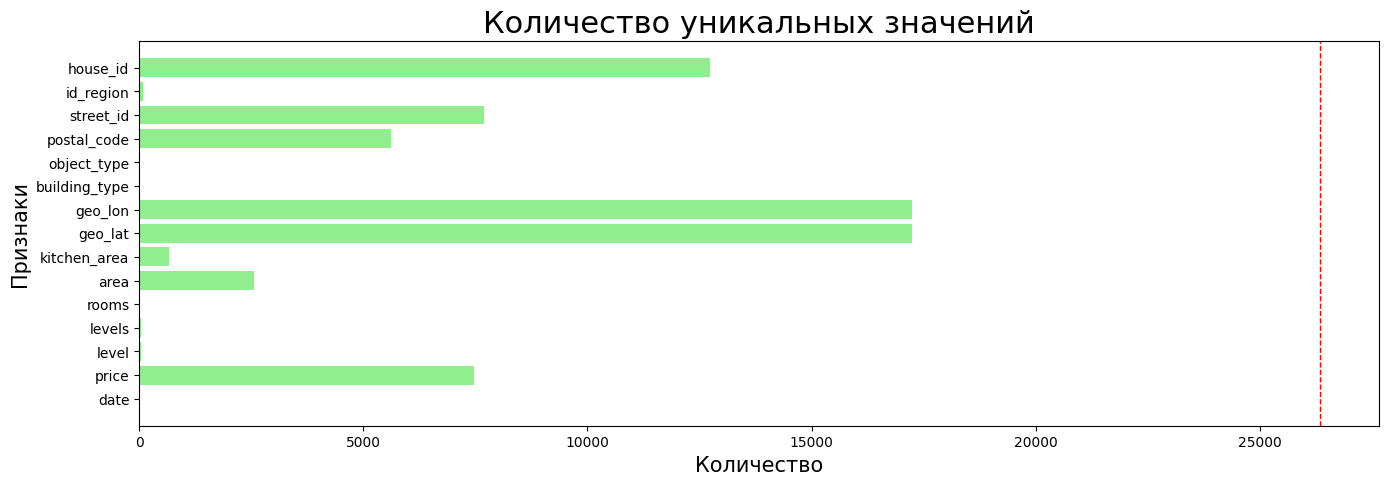

In [11]:
fig = plt.figure(figsize=(16,5))
ax=fig.subplots()
ax.axvline(x=data.shape[0], color='r', label='Average', linestyle='--', linewidth=1)
plt.barh(data.columns, data.nunique(), align='center',color='lightgreen')
plt.title("Количество уникальных значений", fontsize=22)
plt.xlabel('Количество', fontsize=15)
plt.ylabel('Признаки', fontsize=15)
plt.show()

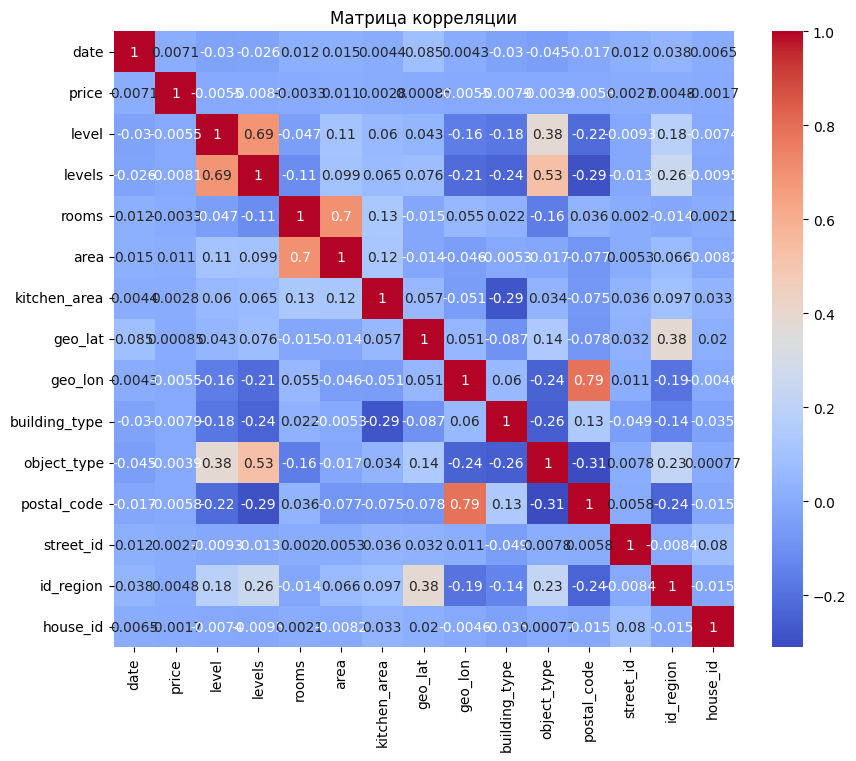

In [12]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

In [13]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, training_set.max().astype(training_set.dtype) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

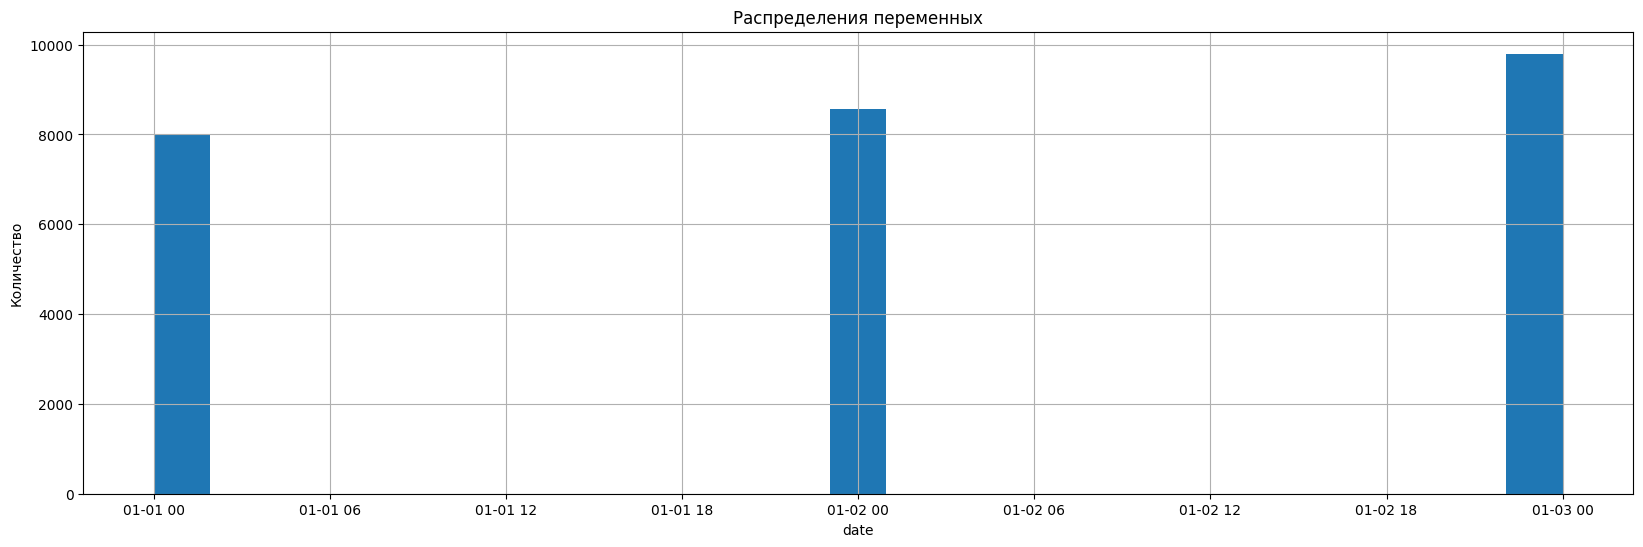

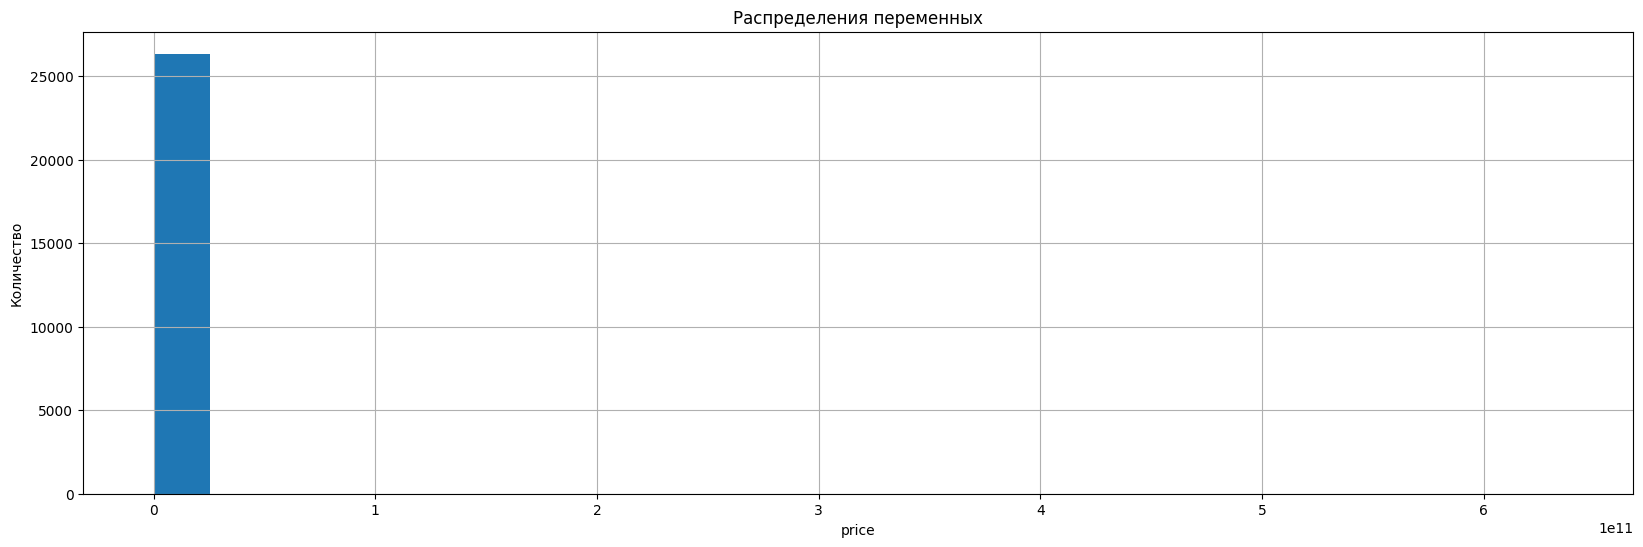

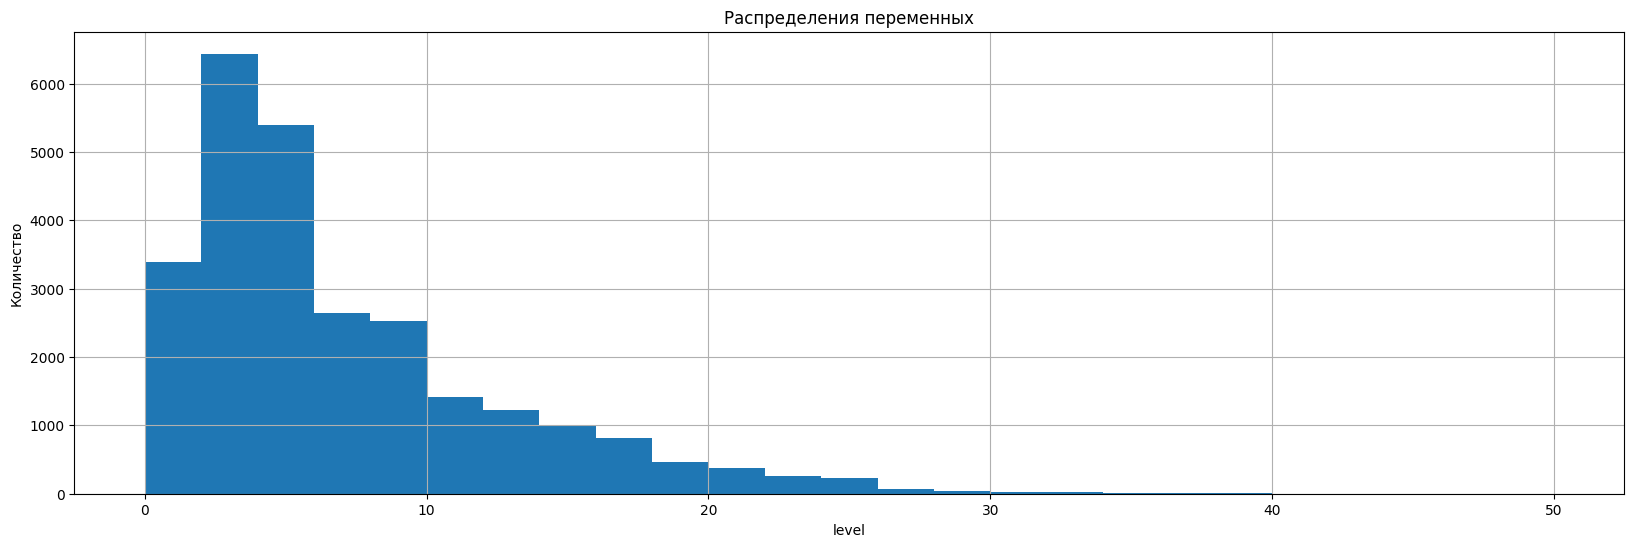

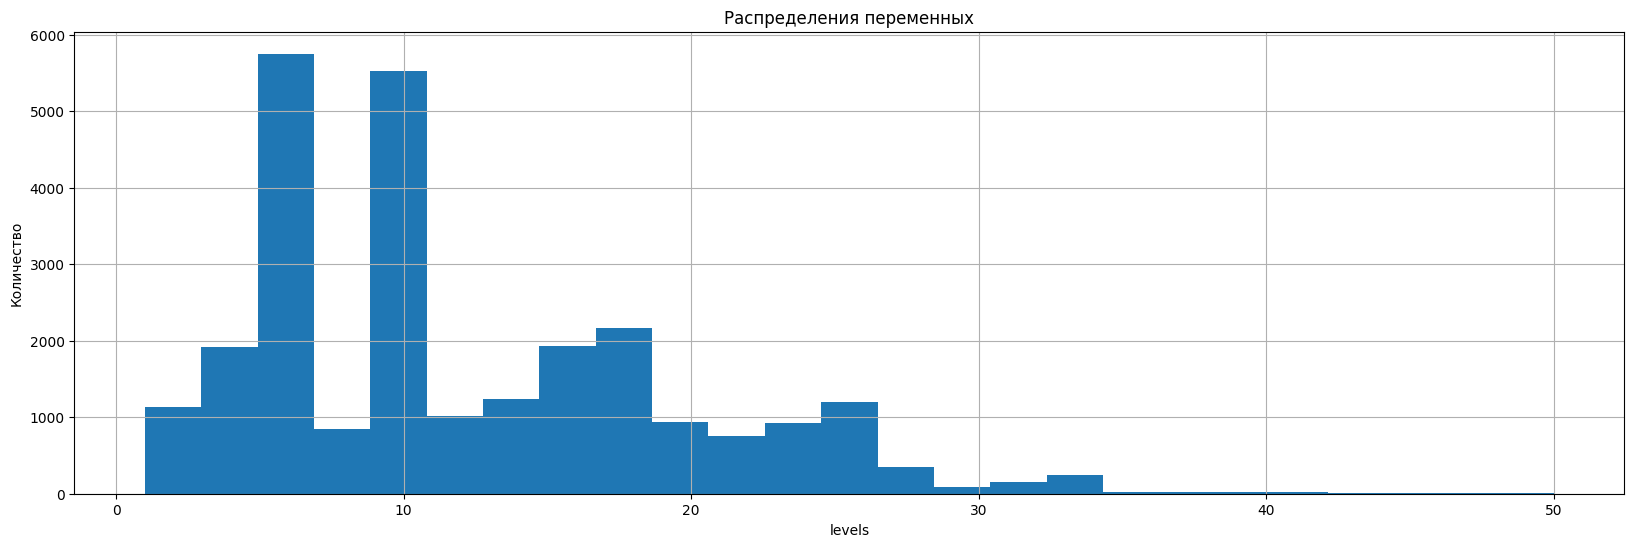

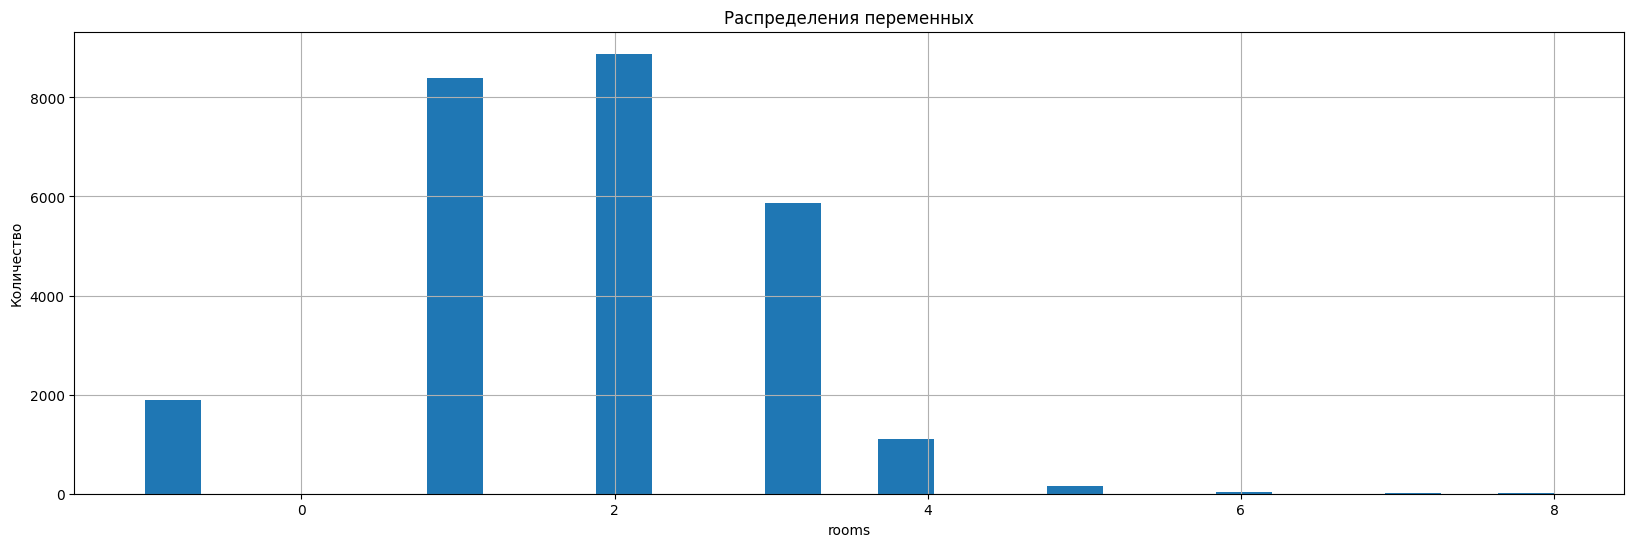

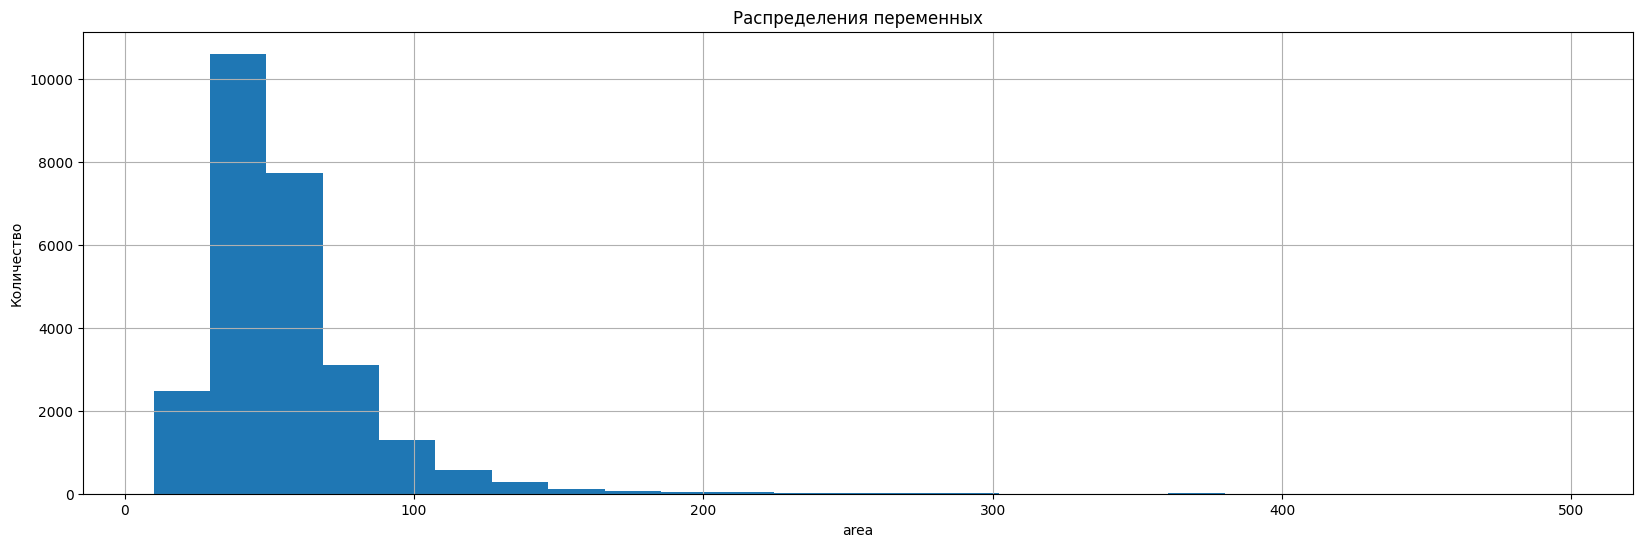

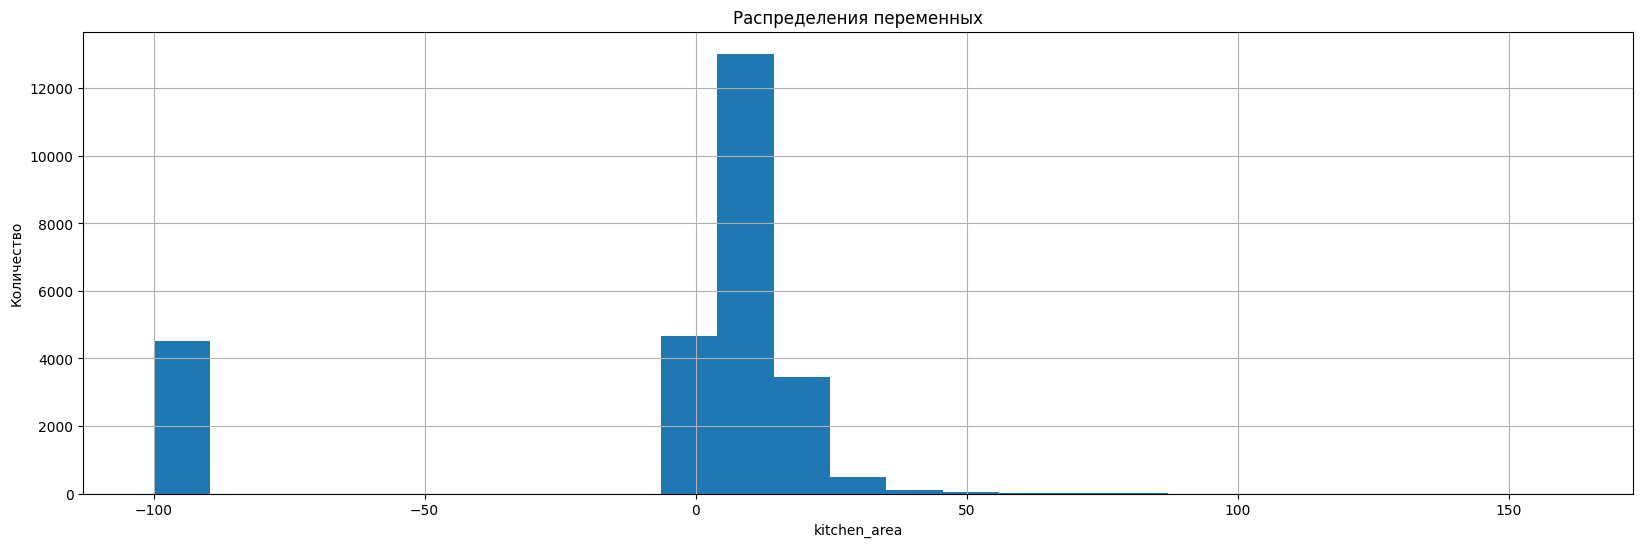

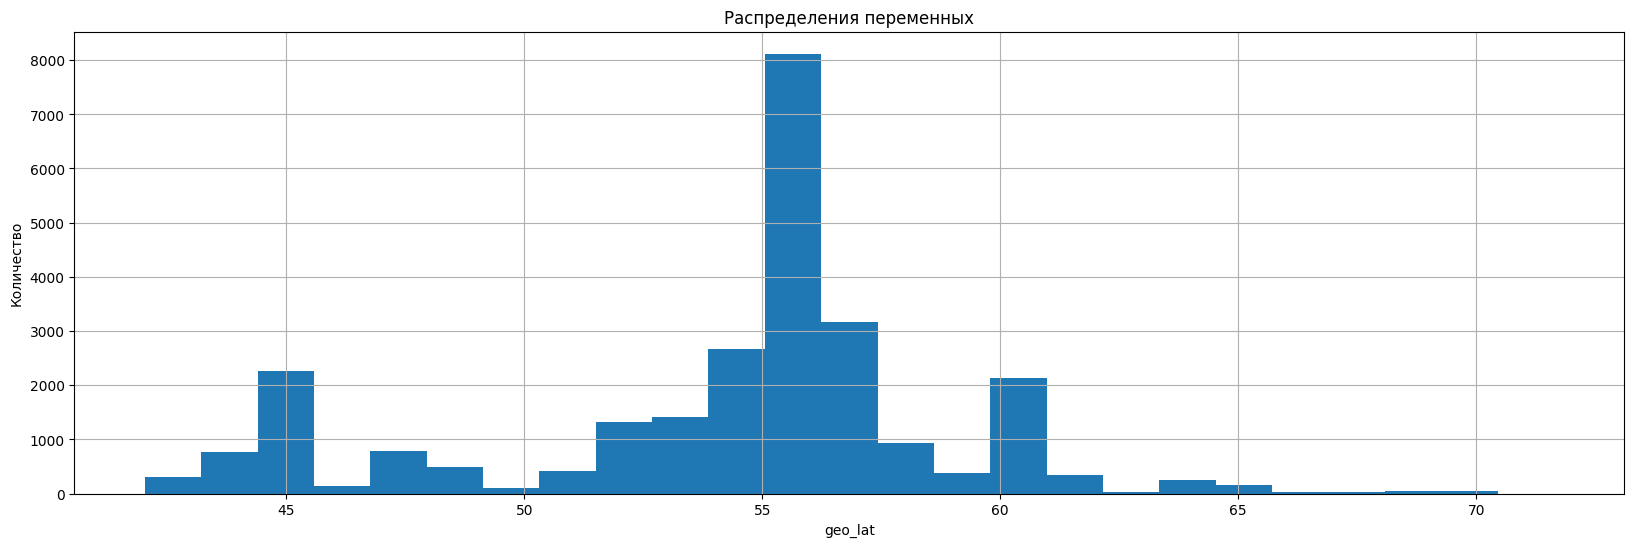

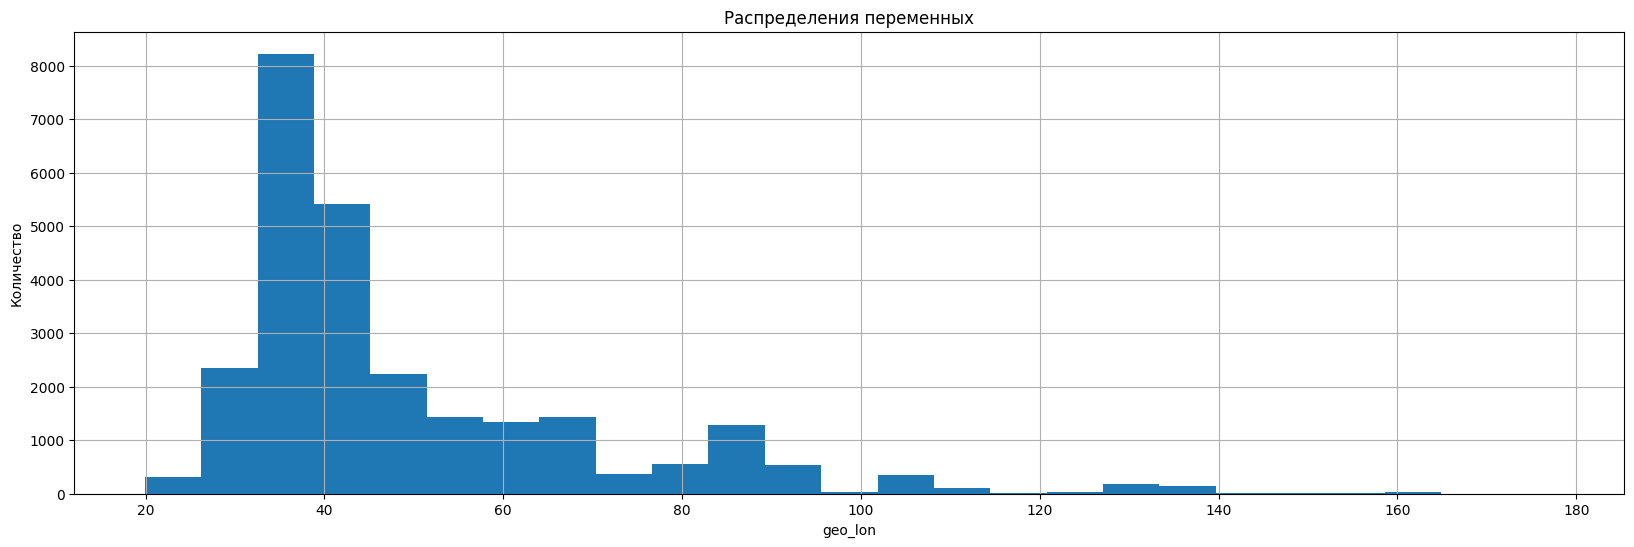

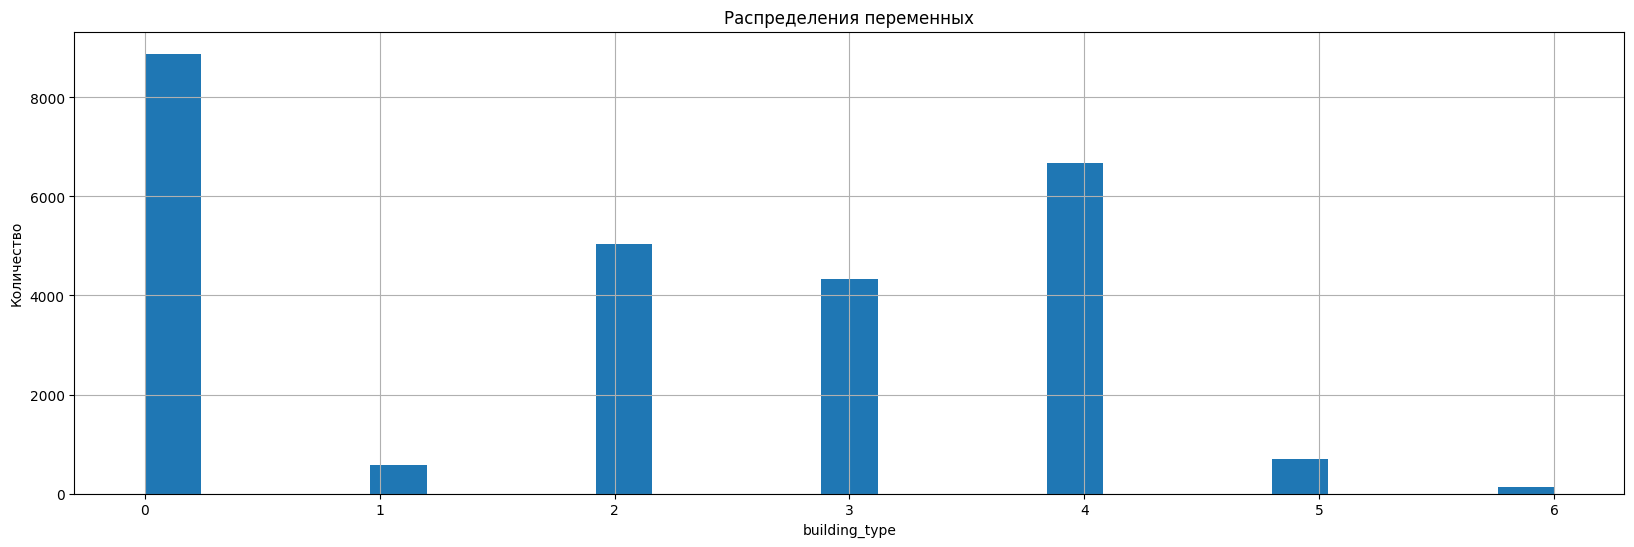

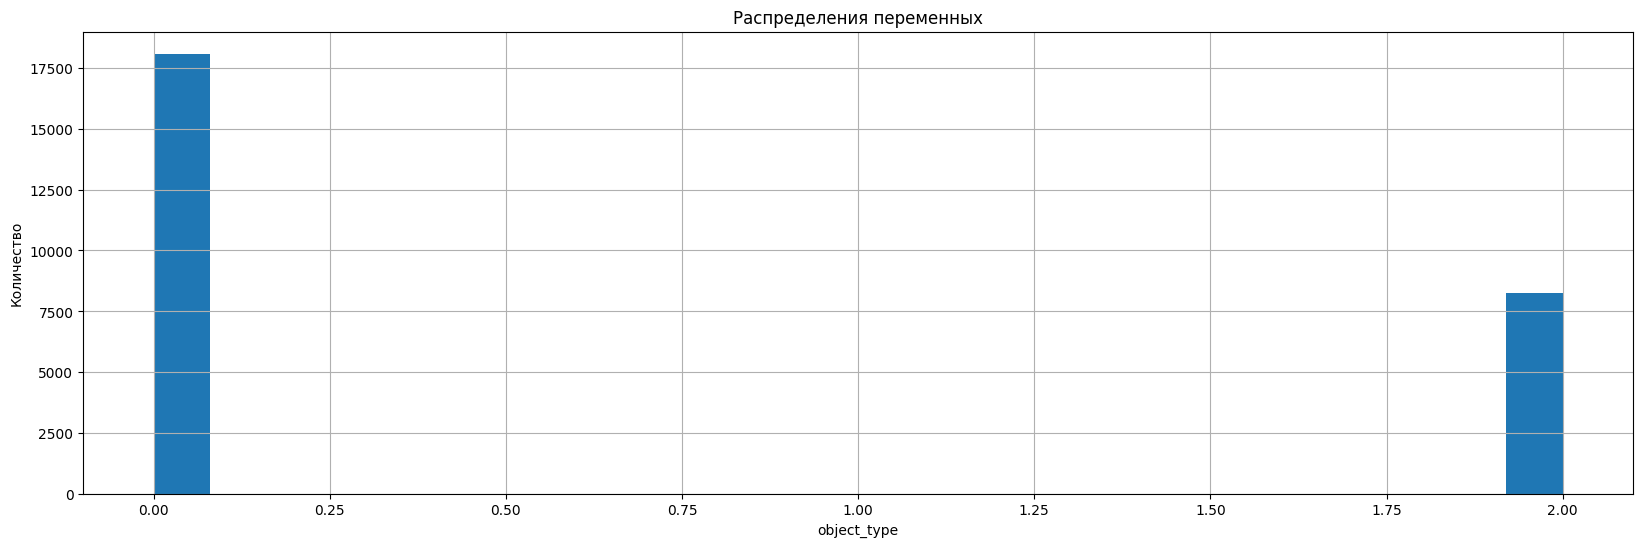

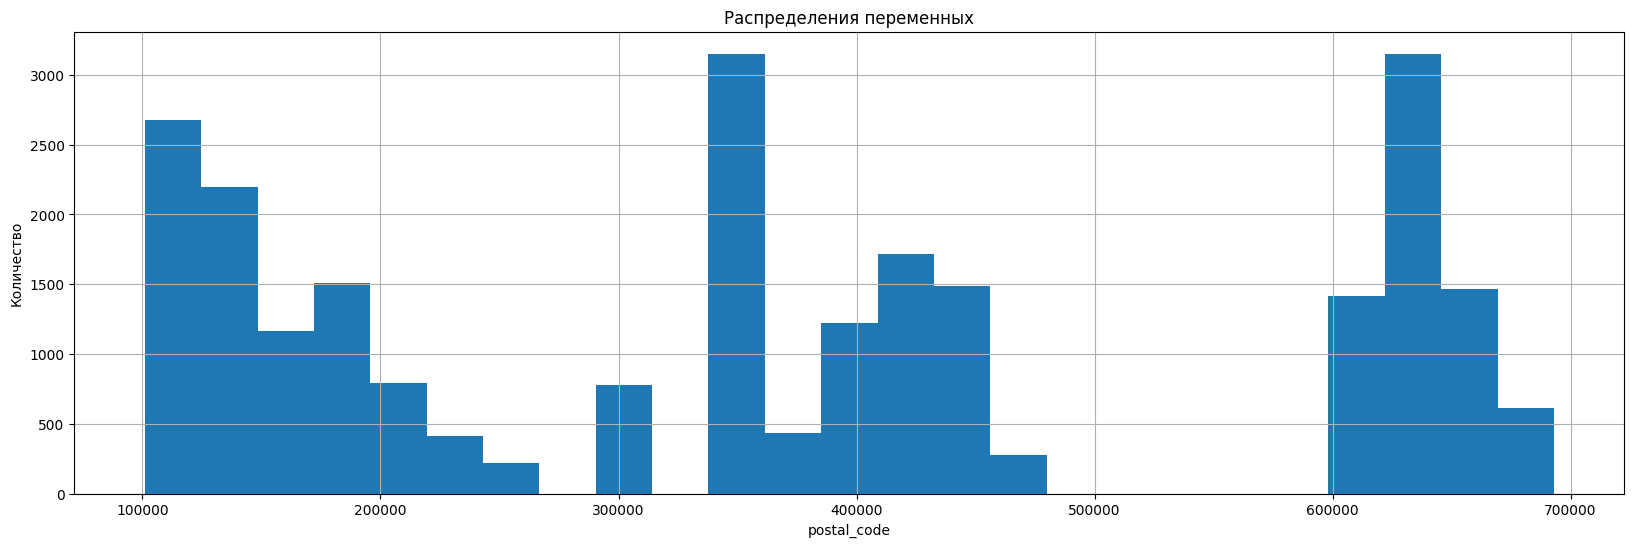

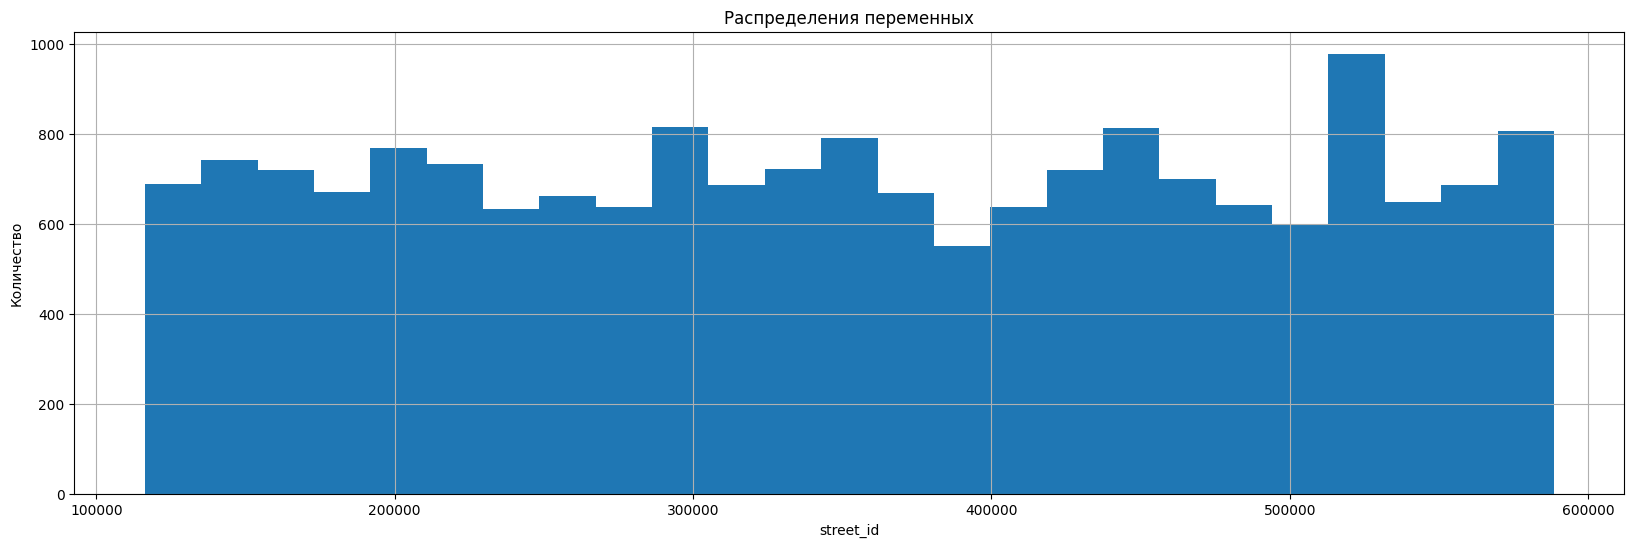

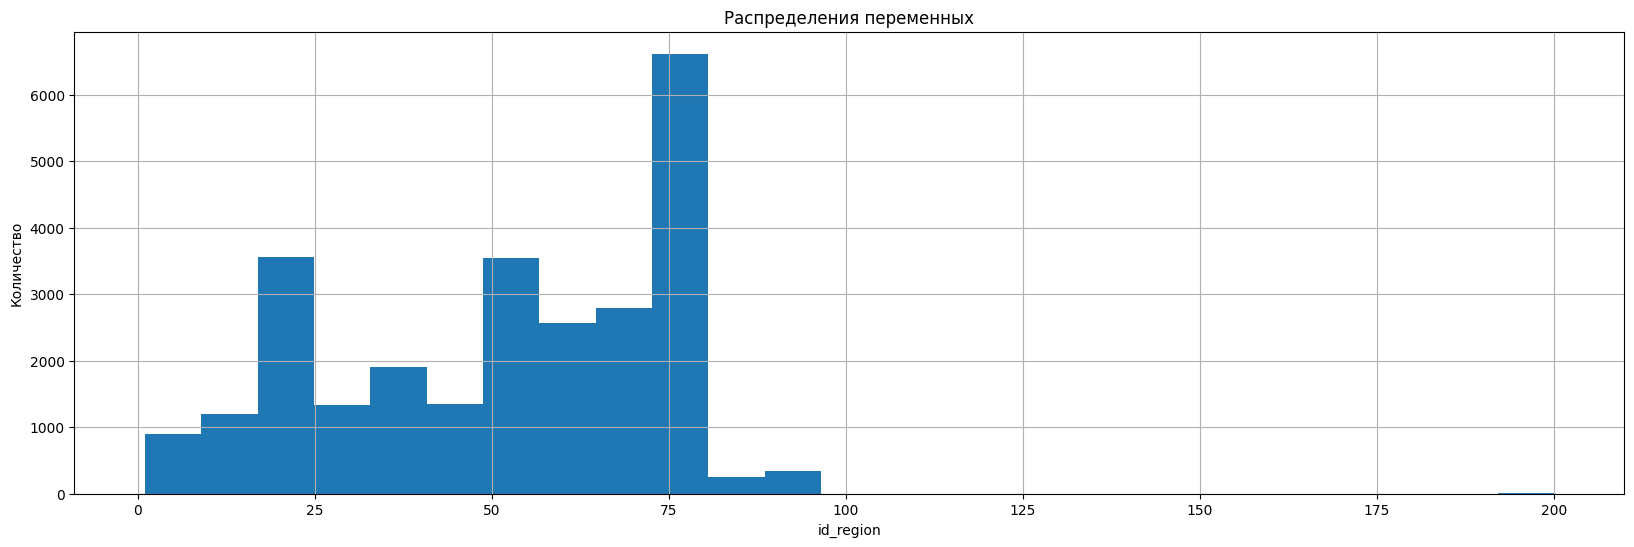

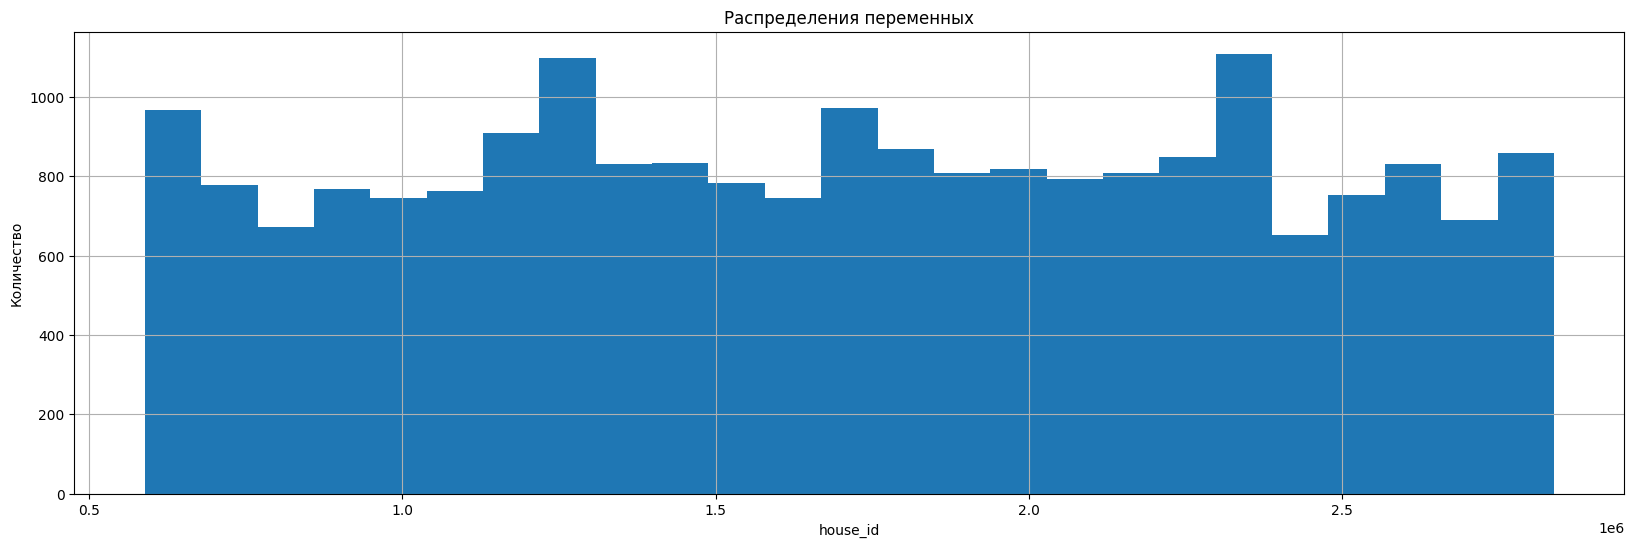

In [14]:
for i in data.columns:
    if data[i].dtype!='object':
        custom_hist(data[i], 'Распределения переменных', i, bins=25)

In [15]:
def info(column):
    plt.title(str(column))
    ax = sns.barplot(x=data[column].value_counts().index, y=data[column].value_counts())
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    plt.show()

In [16]:
for column in data.columns:
    if data[column].dtype == 'object':
        info(column)

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [18]:
ohe = OneHotEncoder()

for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = data[i].fillna('null'+i)
        transformed = ohe.fit_transform(data[[i]])
        data[ohe.categories_[0]] = transformed.toarray()
        data = data.drop(i, axis = 1)
data

,date,price,level,levels,rooms,area,kitchen_area,geo_lat,geo_lon,building_type,object_type,postal_code,street_id,id_region,house_id
0,2021-01-01,2451300,15.0,31.0,1.0,30.3,0.0,56.780112,60.699355,0.0,2.0,620000.0,NaN,66.0,1632918.0
1,2021-01-01,1450000,5.0,5.0,1.0,33.0,6.0,44.608154,40.138381,0.0,0.0,385000.0,NaN,1.0,NaN
2,2021-01-01,10700000,4.0,13.0,3.0,85.0,12.0,55.540060,37.725112,3.0,0.0,142701.0,242543.0,50.0,681306.0
3,2021-01-01,3100000,3.0,5.0,3.0,82.0,9.0,44.608154,40.138381,0.0,0.0,385000.0,NaN,1.0,NaN
4,2021-01-01,2500000,2.0,3.0,1.0,30.0,9.0,44.738685,37.713668,3.0,2.0,353960.0,439378.0,23.0,1730985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26337,2021-01-03,1950000,5.0,5.0,1.0,32.0,-100.0,56.517950,85.049590,4.0,0.0,634040.0,NaN,70.0,NaN
26338,2021-01-03,2779700,18.0,25.0,1.0,41.8,-100.0,47.245329,39.701206,3.0,2.0,344038.0,203005.0,61.0,1816091.0
26339,2021-01-03,2779700,23.0,25.0,1.0,41.8,-100.0,47.245329,39.701206,3.0,2.0,344038.0,203005.0,61.0,1816091.0
26340,2021-01-03,2779700,1.0,25.0,1.0,41.8,-100.0,47.245329,39.701206,3.0,2.0,344038.0,203005.0,61.0,1816091.0


In [19]:
X = data.drop('price', axis=1)
y = data[['price']]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [ ]:
import catboost
from catboost import CatBoostRegressor

In [ ]:
model = CatBoostRegressor(
        loss_function='RMSE',
        eval_metric='RMSE',
        depth=8,
        learning_rate=0.03,
        n_estimators=10000,       # с ранней остановкой подберёт оптимум
        random_seed=42,
        od_type='Iter',
        od_wait=100,
        verbose=200
    )


In [ ]:
model.fit(
        X_train, y_train
    )
y_pred = model.predict(X_test)

In [ ]:
model.save_model("model.cbm")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

def regression_metrics(y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2   = r2_score(y_true, y_pred)
    mape = (np.mean(np.abs((np.array(y_true) - np.array(y_pred))
                           / np.maximum(np.abs(y_true), 1e-9))) * 100)

    return pd.Series({
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2,
        "MAPE_%": mape
    })

# пример:
# y_pred = model.predict(X_val)
regression_metrics(y_test, y_pred).to_frame("value")